#### This example will used scaled error metrics for easier interpretation
However, using the model in practice (tester_row etc.) will become slightly more difficult after this.

In many regression tasks, scaled values are not compulsory, but they give nicer metrics. In some algorithms, scaling is compulsory, like logistic regression.

<b>Linear regression - example 2 - Housing dataset</b>

In [28]:
# usual imports
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer, QuantileTransformer



In [29]:
# load the data 
df = pd.read_csv("Housing.csv")

In [30]:
df.head()

# we can already see here there's quite many boolean-variables (yes/no)
# ALL OF THESE HAVE TO BE CONVERTED TO 0 or 1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

<b>Converting text categories into numeric format</b>

**Case 1: Binary variables (only two options)**

In [32]:
# WITH BOOLEAN TEXT VALUES => LabelEncoder is the best option
# since we can convert all of the boolean variables all at once
# any text column with exactly two options is considered a boolean

# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder

# list of all boolean variables we want to convert
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [33]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


**Case 2: Ordinal variables (categories that have an order/rank -> can be compared)**

In [34]:
# no ordinals in this dataset

**Case 3: Nominal categories (categories that can't be compared numerically)**

In [35]:
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [37]:
# see the materials (Rovaniemi/Oulu/Helsinki), we can make a small optimization
# => remove the last new boolean variable (since it's going to be represented
# by a straight line of zeroes)
df = df.drop("furnishingstatus_unfurnished", axis=1)

In [38]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0,0


In [39]:
# do we have any missing values?
df.isna().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
dtype: int64

In [40]:
# do we have duplicates?
int(df.duplicated().sum())

0

<b>Train/test split</b>

In [41]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished'],
      dtype='str')

In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [ ]:
# first, we split into X and y
# in other words, we split the dataset into support variables (X)
# and the target variable (y)

# X = list of all support variables you want to use
# while predicting the target variable with your model

# a small trick => use everything else except, the target
X = df.drop("price", axis=1)

# our target variable is y
y = df['price']

In [ ]:
# create train/test split with scikit-learn's helper function
# random_state is optional, you can lock down the randomness for same results everytime
# this is sometimes helpful when you want to minimize randomness in order to maximize optimizations
# test_size=0.3 means 30% for the testing dataset, and scikit-learn can automatically deduce
# training size will be 70% (because 100 - 30 = 70)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**This is where we scale the values. Use separate scalers for X and y, and only scale after train-test -split.**

ALSO! Only fit the scaling algorithm on TRAIN data, don't fit on TEST data!

In [ ]:
# transform support variables, change the scaler if you wish!
x_scaler = MinMaxScaler()
x_scaler.fit(X_train)

# transform target variable separately to avoid data leakage
#y_scaler = QuantileTransformer(output_distribution='normal', random_state=42)
y_scaler = MinMaxScaler()
y_scaler.fit(y_train.values.reshape(-1, 1))

# transform/scale all our support variables in train, validation and test datasets
X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

# transform/scale all our target variables in train, validation and test datasets
# scalers and transformers often require data in NumPy -format
# this is why we need the values.reshape(-1, 1)
y_train = y_scaler.transform(y_train.values.reshape(-1, 1))
y_test  = y_scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
# create an empty linear regression model
# and fit it with our data (fit => start training with the data)
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


<b>Error and performance metrics</b>

In [ ]:
# create test predictions based on the earlier test dataset
# we reserved out from the original dataset 
# this data has never been seen by the model by now
predictions = model.predict(X_test)

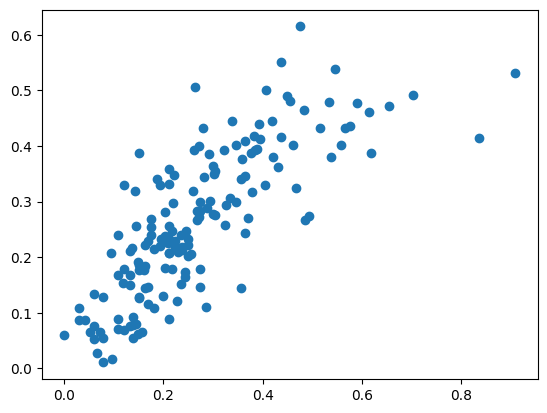

In [ ]:
# let's plot how far the predictions are from the real true y-values
# in the test dataset

# if these values follow a diagonal line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
plt.scatter(y_test, predictions)
plt.show()

In [ ]:
# NOTE! Change the units so that they match with your dataset's target variable
# for example, if your model is predicting Centigrades (C), don't use $-signs 
# in the metrics

# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "error units")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "error units^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "error units (0.1 ~~ 10 %, kind of)")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.07 error units

MSE
0.01 error units^2

RMSE:
0.1 error units (0.1 ~~ 10 %, kind of)

R-squared:
0.61


In [ ]:
# OPTIONAL! let's compare how the scaling works against original value ranges

# let's get data min and max
min_price = df['price'].min()
max_price = df['price'].max()

# the RMSE value actually reverts back to the original RMSE from the unscaled version
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
actual_error_value = RMSE * (max_price - min_price)
actual_error_value

np.float64(1124458.1650948524)

C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_10184\3920156057.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


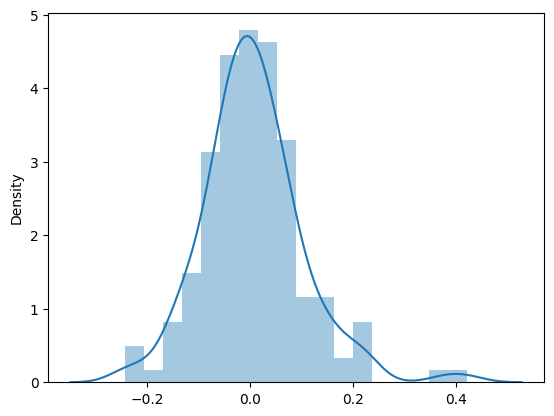

In [ ]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - predictions))
plt.show()
plt.close()

<b>Last phase: try the model in practice (we could connect this part into a GUI too!)</b>

Technically, we have to inverse the transform of scaling once we start to use the model in practice.

In [ ]:
# usually in a GUI application
# we save the earlier model-object into a file (using joblib-module)
# and in a separate GUI-application => we load up the saved model from the file
# and use the model just like here below:

# map all the variables from the user
# into a Python dictionary
# the variable names have to match with the original dataset
tester_row = {
    "area": 7420,
    "bedrooms": 4,	
    "bathrooms": 2,
    "stories": 3,	
    "mainroad": 1, 
    "guestroom": 0,
    "basement": 0,
    "hotwaterheating": 0,
    "airconditioning": 1,
    "parking": 2,
    "prefarea": 1,
    "furnishingstatus_furnished": 1,	
    "furnishingstatus_semi-furnished": 0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

# scale our tester_row, with original scaler, drop price after scaling
# NOTE! use trasnform instead of fit_transform in this phase
# fit_transform will re-train the weights in the scaler, and the values will
# be wrong! Rule of thumb: use fit_transform only in the beginning when creating
# the scaler!
tester_row = x_scaler.transform(tester_row)


In [ ]:
# get the output/result/answer from the model
# based on the user's new data (from above code cell)
result = model.predict(tester_row)

# we have to run our new complete through the same scaler
# with target variable included

# final step, inverse transform the scaling back to actual value
result = y_scaler.inverse_transform(result)
result = result[0][0]

print()
print(f"Predicted house price with given parameters:")
print(f"{round(float(result), 2)} $")
print("----------------")



Predicted house price with given parameters:
8176816.65 $
----------------
